In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Unicorn_Companies.csv")

In [3]:
data.head(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### **DATA CLEANING**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [5]:
#Checking duplicated values
data.duplicated().value_counts()

False    1074
dtype: int64

In [6]:
# Checking null values
data.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [7]:
#Finding rows with null values
data[data.isnull().any(axis = 1)]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."


In [8]:
# Replace NaN values
data.at[12,'City'] = 'Bahamas'
data.at[325,'City'] = 'Hong Kong'
data.at[893,'City'] = 'Hong Kong'
data.at[1061,'City'] = 'Hong Kong'
data.at[170,'City'] = 'Singapore'
data.at[242,'City'] = 'Singapore'
data.at[251,'City'] = 'Singapore'
data.at[382,'City'] = 'Singapore'
data.at[541,'City'] = 'Singapore'
data.at[811,'City'] = 'Singapore'
data.at[848,'City'] = 'Singapore'
data.at[880,'City'] = 'Singapore'
data.at[889,'City'] = 'Singapore'
data.at[980,'City'] = 'Singapore'
data.at[986,'City'] = 'Singapore'
data.at[994,'City'] = 'Singapore'
data['Select Investors'].fillna('No Investors', inplace=True)

In [9]:
#Don't have null values anymore
data.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [10]:
# Rename columns name
data.rename(columns={'Date Joined':'Date','Select Investors':'Investors'}, inplace = True)

In [11]:
# Split date column
date = data.Date.str.split('-', expand =True)
data['day'] = date[2]
data['month'] = date[1]
data['year'] = date[0]
data.year = pd.to_numeric(data.year)
data.month = pd.to_numeric(data.month)
data.day = pd.to_numeric(data.day)
data.year = pd.to_numeric(data.year)

In [12]:
#Converting
data['Valuation']=data['Valuation'].str.replace('$', '')
data['Valuation']=data['Valuation'].str.replace('B', '')
data.Valuation = pd.to_numeric(data.Valuation)

<ipython-input-12-75dce97f52fe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Valuation']=data['Valuation'].str.replace('$', '')


In [13]:
#Converting
data['Funding']=data['Funding'].str.replace('$', '')
data['Funding']=data['Funding'].str.replace('B', '')
data['Funding']=data['Funding'].str.replace('M', '')
data['Funding'] = data['Funding'].replace('Unknown', '0')

<ipython-input-13-4822fd86dca8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Funding']=data['Funding'].str.replace('$', '')


In [14]:
data.Funding = pd.to_numeric(data.Funding)

In [15]:
data.head(5)

,Company,Valuation,Date,Industry,City,Country,Continent,Year Founded,Funding,Investors,day,month,year
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",7,4,2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1,12,2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China...",3,7,2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG",23,1,2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita...",12,12,2011


## 1. Top 10 companies with the biggest return on investment

In [16]:
# Calculating ROI
data['ROI'] = data['Valuation']/data['Funding']

In [17]:
# Sort the companies by ROI and get the top 10
top_10_roi_companies = data.sort_values(by='ROI', ascending=False).head(10)

In [18]:
for i, row in top_10_roi_companies.iterrows():
    print(f"{i+1}. {row['Company']}")

190. Otto Bock HealthCare
568. ISN
734. DistroKid
1003. Poizon
718. Veepee
425. Uplight
216. SSENSE
867. Assembly
891. Carson Group
652. Xiaobing


<function matplotlib.pyplot.show(close=None, block=None)>

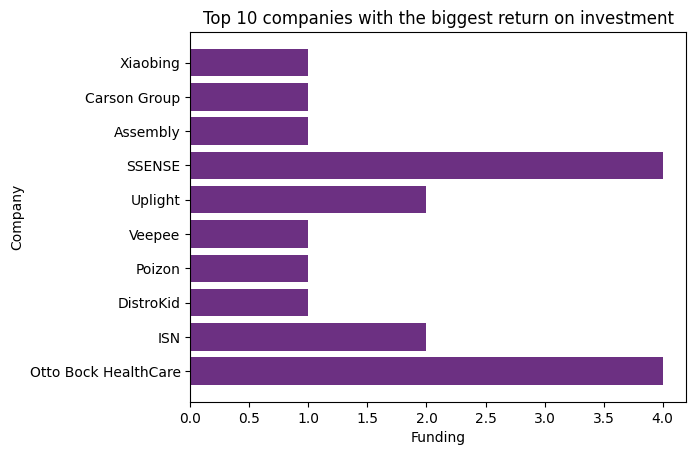

In [91]:
plt.barh( top_10_roi_companies['Company'], top_10_roi_companies['Valuation'], color='#6c3082')
plt.title('Top 10 companies with the biggest return on investment')
plt.xlabel('Funding')
plt.ylabel('Company')
plt.show

## 2. Top 5 countries and Top  5 cities with the highest number of Unicorn Companies

In [95]:
top_5_countries = data.groupby(['Country']).Company.count().reset_index().sort_values('Company', ascending=False).head(5)
print(top_5_countries)

           Country  Company
44   United States      562
9            China      173
19           India       65
43  United Kingdom       43
17         Germany       26


<function matplotlib.pyplot.show(close=None, block=None)>

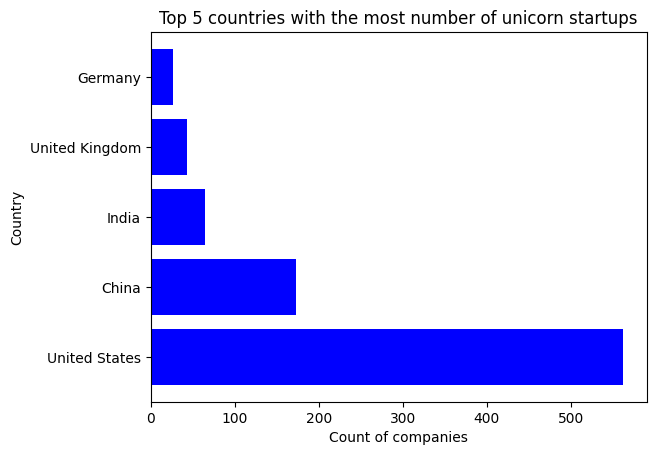

In [96]:
plt.barh(top_5_countries ['Country'], top_5_countries ['Company'], color='blue')
plt.title('Top 5 countries with the most number of unicorn startups')
plt.xlabel('Count of companies')
plt.ylabel('Country')
plt.show

In [92]:
Top_5_cities = data.groupby(['City']).Company.count().reset_index().sort_values('Company', ascending=False).head(5)
print(Top_5_cities)

              City  Company
200  San Francisco      152
162       New York      103
14         Beijing       63
215       Shanghai       44
131         London       34


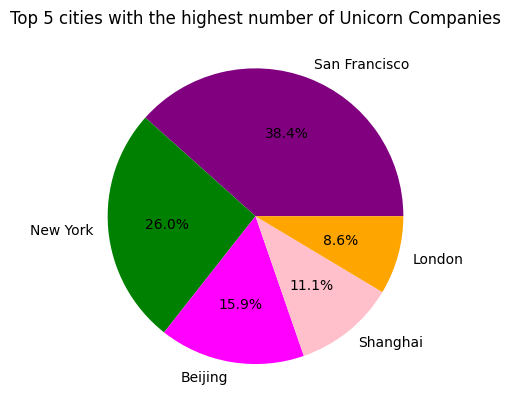

In [93]:
plt.pie(Top_5_cities['Company'],labels=Top_5_cities['City'],autopct='%1.1f%%',colors=['purple','green','magenta','pink','orange'])
plt.title('Top 5 cities with the highest number of Unicorn Companies')
plt.show()

## 3. Number of unicorns per year

In [19]:
Number_of_unicorns = data.groupby(['year']).Company.count().reset_index().sort_values('year', ascending=False)
print(Number_of_unicorns)

    year  Company
12  2022      116
11  2021      520
10  2020      108
9   2019      104
8   2018      103
7   2017       44
6   2016       21
5   2015       35
4   2014       13
3   2013        3
2   2012        4
1   2011        2
0   2007        1


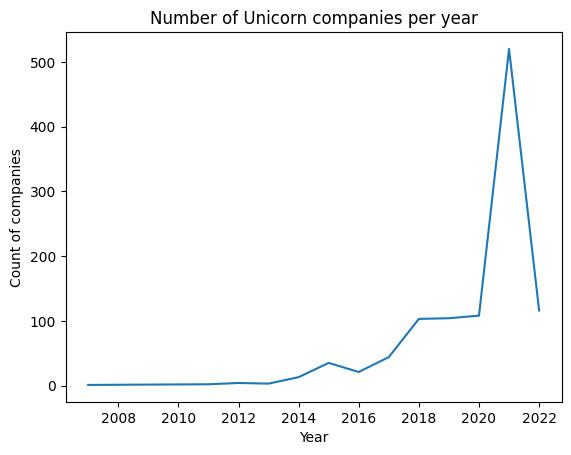

In [21]:
plt.plot(Number_of_unicorns['year'], Number_of_unicorns['Company'])
plt.xlabel('Year')
plt.ylabel('Count of companies')
plt.title('Number of Unicorn companies per year')
plt.show()

## 4. Top industries with most unicorn companies

In [ ]:
By_industry = data.groupby(['Industry']).Company.count().reset_index().sort_values('Company', ascending=False)
print(By_industry)

                               Industry  Company
8                               Fintech      224
11         Internet software & services      205
6       E-commerce & direct-to-consumer      111
10                               Health       74
1               Artificial intelligence       73
13                                Other       58
14  Supply chain, logistics, & delivery       57
4                         Cybersecurity       50
5           Data management & analytics       41
12          Mobile & telecommunications       38
9                              Hardware       34
2                 Auto & transportation       31
7                                Edtech       28
3                     Consumer & retail       25
15                               Travel       14
0               Artificial Intelligence       11


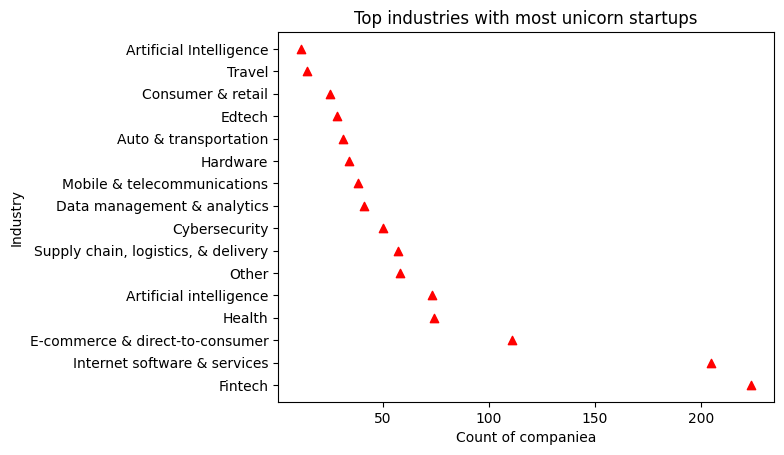

In [ ]:
plt.scatter(By_industry['Company'], By_industry['Industry'],color='red',marker='^')
plt.title('Top industries with most unicorn startups')
plt.xlabel('Count of companiea')
plt.ylabel('Industry')
plt.show()

## 5. Investors which have funded the most unicorns

In [99]:
investor_counts = data.groupby('Select Investors')['Company'].count().reset_index(name='Count')
investor_counts = investor_counts.sort_values('Count', ascending=False)

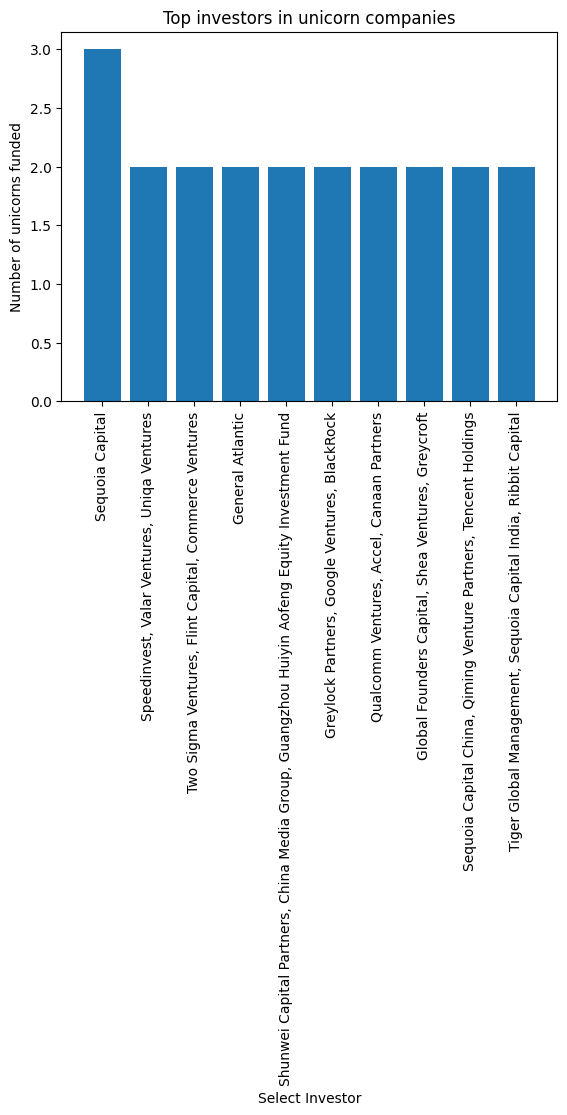

In [106]:
top_investors = investor_counts.head(10)
plt.bar(top_investors['Select Investors'], top_investors['Count'])
plt.xticks(rotation=90)
plt.xlabel('Select Investor')
plt.ylabel('Number of unicorns funded')
plt.title('Top investors in unicorn companies')
plt.show()